# Exploratory Data Analysis: Laptop Price Prediction

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# Import dependencies from data analyses 
from descriptive_data_analysis import DataLoader
from descriptive_data_analysis import DescriptiveAnalysis, StatisticalSummary
from univariate_analysis import NumericalAnalysis

EDA process happens in different tasks: 
+ Descrptive Analysis
+ Missingvalue Analysis 
+ Inconsistency Analysis 
+ Univariate Analysis 
+ Multivariate Analysis 
+ Outlier Detection

In [3]:
# Load the dataframe 
path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"
data_loader = DataLoader(path)
laptop_df = data_loader.loading("ebay_laptop_dataset.csv")
laptop_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mian_\AppData\Local\Temp\ipykernel_8488\2211975360.py:2: SyntaxWarning: invalid escape sequence '\P'
  path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"


,Brand,Price,Currency,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,...,Height of the Display,OS,Storage Type,Hard Drive Capacity,Hard Drive Capacity Unit,SSD Capacity,SSD Capacity Unit,Screen Size (inch),Ram Size,Ram Size Unit
0,other,303.80,$,gray,"Backlit Keyboard, Built-in Microphone, Built...",New,"A brand-new, unused, unopened, undamaged item ...",undefined,intel,quad core,...,1440.0,windows,ssd,512.0,gb,1.0,tb,14,8.0,gb
1,dell,400.00,$,black,"Backlit Keyboard, Bluetooth, Built-in Micropho...",Very Good - Refurbished,The item shows minimal wear and is backed by a...,aaa pcs is a microsoft authorized refurbisher ...,intel,intel core i7 8th generation,...,1080.0,windows,ssd,2.0,tb,NaN,unknown,14,NaN,unknown
2,dell,175.00,$,black,"10/100 LAN Card, Backlit Keyboard, Bluetooth, ...",Used,An item that has been used previously. The ite...,"well kept, fully functional, includes battery,...",intel,intel core i5-6300u,...,1080.0,windows,ssd,500.0,gb,500.0,gb,14,16.0,gb
3,hp,85.00,$,black,"Bluetooth, Built-in Microphone, Built-in Webca...",Good - Refurbished,The item shows moderate wear and is backed by ...,1-year allstate warranty. the original hp char...,intel,intel celeron n,...,768.0,chrome,emmc,16.0,gb,NaN,unknown,11.6,4.0,gb
4,dell,101.25,$,other,"10/100 LAN Card, Built-in Microphone, Built-in...",Good - Refurbished,The item shows moderate wear and is backed by ...,laptops is tested & fully working with some si...,other,intel core i5 6th generation,...,768.0,windows,ssd,NaN,unknown,256.0,gb,12.5,8.0,gb


#1. Descriptive Analysis 

In [4]:
# Identify the dataset 
data_descriptor = DescriptiveAnalysis()
data_descriptor.identify_dataset(df = laptop_df)

Data Information--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     4183 non-null   object 
 1   Price                     4183 non-null   float64
 2   Currency                  4183 non-null   object 
 3   Color                     4183 non-null   object 
 4   Features                  1993 non-null   object 
 5   Condition                 4183 non-null   object 
 6   Condition Description     4183 non-null   object 
 7   Seller Note               4183 non-null   object 
 8   GPU                       4183 non-null   object 
 9   Processor                 4183 non-null   object 
 10  Processor Speed           2090 non-null   object 
 11  Processor Speed Unit      4183 non-null   object 
 12  Type                      4183 non-null   object 
 

In [5]:
# Provide the statistical summary
stats_summarizer = StatisticalSummary()
stats_summarizer.analyse(df = laptop_df, stat_type="Numerical")
stats_summarizer.analyse(df = laptop_df, stat_type="Categorical")
# stats_summarizer.analyse(df = laptop_df, stat_type="categories") # error

Statistical Summary: Numerical Features
Number of numerical features: 6
Statistical Summary: Categorical Features
Number of categorical features: 18


,Brand,Currency,Color,Features,Condition,Condition Description,Seller Note,GPU,Processor,Processor Speed,Processor Speed Unit,Type,OS,Storage Type,Hard Drive Capacity Unit,SSD Capacity Unit,Screen Size (inch),Ram Size Unit
count,4183,4183,4183,1993,4183,4183,4183,4183,4183,2090,4183,4183,4183,4183,4183,4183,2545,4183
unique,10,1,20,709,10,10,795,5,413,97,3,2,6,5,3,3,66,3
top,other,$,other,Touchscreen,Used,An item that has been used previously. The ite...,undefined,other,undefined,2.60,unknown,notebook/laptop,windows,unknown,unknown,unknown,14,unknown
freq,1712,4183,2596,79,2028,2028,3071,2001,1278,259,2093,2215,1968,2298,3078,2054,1009,2531


In [6]:
is_duplicated = laptop_df.duplicated().sum()
print(f"Number of duplicated rows: {is_duplicated}")

Number of duplicated rows: 0


# Descriptive Analysis: Insights 

The laptop dataset contains 4183 rows and 24 features. In more context, the ebay website displays **4183 laptops** that are in sale where **24 specified properties** are indicated to each. The laptop data consists of 2 feature groups that are numerical and categorical. 
    - Numerical features: 6 features, like Price, Width of the Display, height of the Display, Hard Drive Capacity, SSD Capacity, Ram Size 
    - Categorical features: 18 features (Brand, Color, Features, etc.)

The data has no duplicated rows which signifies that all laptops are unique to each other based on their properties. 

# Outlier Detection

In [7]:
# Import depedencies for setting up outlier detection algorithm 
from outlier_detection import OutlierIdentifier

In [8]:
# Set up dataset 
# Set up the path directory --> dataset 
path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"
filename = "ebay_laptop_data_phase3.csv"

# Create outlier detection 
outlier_id = OutlierIdentifier(filename, path)
laptop_df = outlier_id.dataset
laptop_df.head()

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mian_\AppData\Local\Temp\ipykernel_8488\1476377291.py:3: SyntaxWarning: invalid escape sequence '\P'
  path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"


,Brand,Price,Color,GPU,Processor Speed,Display Width,Display Height,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width,Bluetooth,Touchscreen,WiFi,Webcam
0,dell,400.00,black,intel,4.2,1920.0,1080.0,windows,ssd,2000.00,205.95,14.0,5.98,28.571429,0.370370,0.208333,Yes,No,Yes,Yes
1,dell,175.00,black,intel,2.4,1920.0,1080.0,windows,ssd,500.00,500.00,14.0,16.00,12.500000,0.162037,0.091146,Yes,Yes,Yes,Yes
2,hp,85.00,black,intel,2.4,1366.0,768.0,chrome,emmc,16.00,205.95,11.6,4.00,7.327586,0.110677,0.062225,Yes,No,Yes,Yes
3,dell,101.25,other,other,1.4,1366.0,768.0,windows,ssd,98.89,256.00,12.5,8.00,8.100000,0.131836,0.074122,No,No,Yes,Yes
4,acer,50.00,black,other,1.6,1366.0,768.0,chrome,ssd,98.89,16.00,11.6,4.00,4.310345,0.065104,0.036603,Yes,Yes,No,No


## Correlation Analysis

In [9]:
# import libraries for making correlation analysis among features 
from correlation_analysis import CorrelationAnalysis

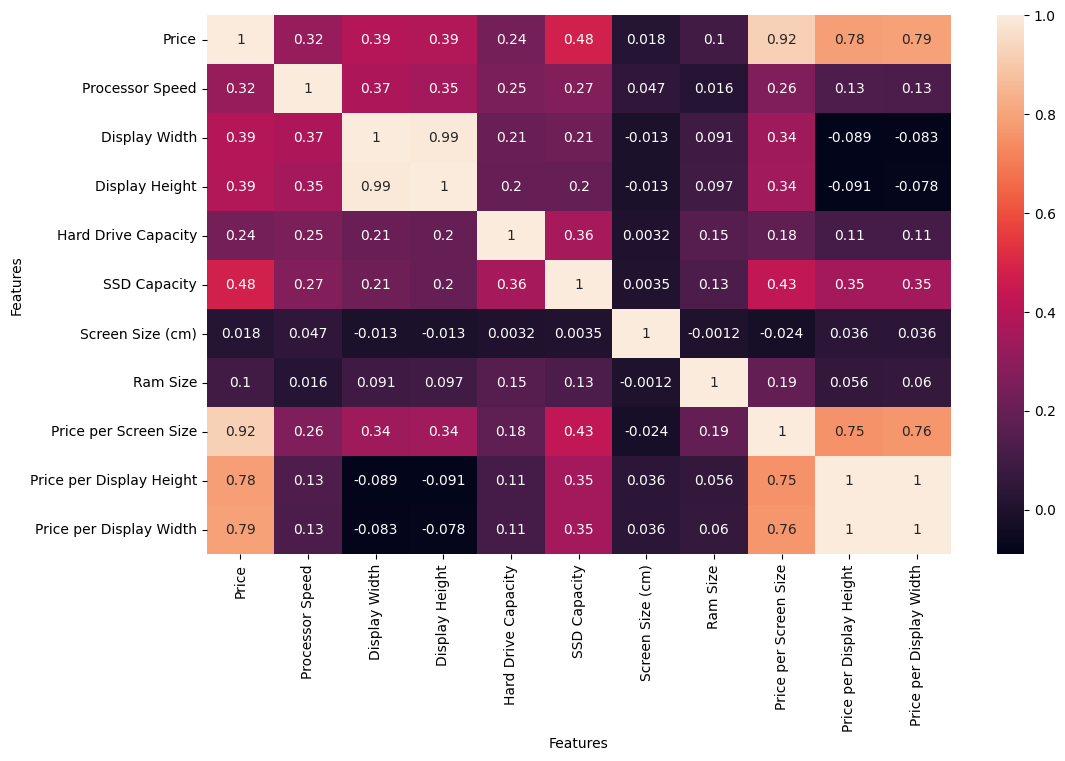

In [10]:
# build a correlation analysis based on given dataset
corr_an = CorrelationAnalysis(laptop_df)
# corr_an.visualise(10, 6)
corr_an.visualise(12, 7)

In [11]:
# Show features with strong correlations
corr_an.feature_strong_corr()

High correlated features: 7


,Features(HC),CorrelationIndex
0,Processor Speed,0.321603
2,Display Height,0.390451
1,Display Width,0.391533
3,SSD Capacity,0.478266
5,Price per Display Height,0.783543
6,Price per Display Width,0.792530
4,Price per Screen Size,0.921843


The features with the strongest correlation index:
+ Price per Screen Size
+ Price per Display Width
+ Price per Display height
+ SSD Capacity